In [4]:
%matplotlib inline
import matplotlib
import seaborn as sns
import numpy as np
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

# Practical Linear Algebra


Linear algebra is a large, diverse subject with a surprisingly large array of applications.  It's the language of many mathematical and physical theories, machine learning, and efficient computation.  We'll focus on the practical aspects for the last two topics - very often, if you can express your computation through linear algebra rather than through a loop, you can take advantage of some highly optimized algorithms that will run much faster.

Linear algebra lends itself to two interpretations: numerical and geometric.  We'll focus on the numerical, and only draw in the geometric when we need it.  If you were taking a formal class on linear algebra, you'd do the opposite and have the geometric interpretation foremost.  However, we're doing this in a few hours instead of a few weeks, so compromises need to be made.

# Literature

* Introduction to Linear Algebra, Fifth Edition by Gilbert Strang
* Linear Algebra: Step by Step by Kuldeep Singh
* Matrix Analysis by Roger A. Horn, Charles R. Johnson

## Linear equations


We'll follow convention and denote variables by $x$, $y$, $z$, $w$, and $t$ and pull in more letters if we need to.  An equation is _linear_ if all the variables appear as things like $2 x$ - i.e. no powers, no complicated functions, just the variable and a constant.  We'll be looking at systems of linear equations, where we have several of these we're trying to solve at the same time.


**Question:** Which of these equations are linear (again, $x$, $y$, $z$, $w$, and $t$ are variables and the rest are constants)?
 1. $z = 0$
 1. $\pi w - e y = 4 x$
 1. $x^2 + x - 2 = 0$
 1. $\sin(x) + \cos(y) = 0$
 1. $x y + x z = 1$
 1. $x^2 = 2$
 1. 4 (x + y) = 3 y

One use of matrices and vectors is to compactly express a system of linear equations. Before we see this application, let's first discuss matrices and vectors.

## Note
5. two variables no linear

## Vectors and matrices

Vectors can be thought of as a collection of numbers, like a list.  They have a geometric meaning too, but we're not going to worry about that right now.  We take each row or element to be associated with a particular _dimension_ - a measurement of something, like a sensor value, a distance in a particular direction, a price, etc.  Note that we have written these as "column vectors" - more on that in a moment.

$$\vec{x} = \begin{pmatrix}t\\y\\z\\w\end{pmatrix} \qquad \vec{e} = \begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix}$$

Side note: vectors in $\mathbb{R}^n$: any vector can be interpreted as a location or direction in space, by simply taking the values to be the $x$, $y$, $z$, etc coordinates.  This is the beginning of the "geometric" interpretation that we're glossing over.

If a vector is a list, a _matrix_ is a list of lists.  They don't just have a length, they have two dimensions.  The order is row x columns, so for

$$\mathbf{B} = \begin{pmatrix}a_0 & b_0 & c_0\\a_1 & b_1 & c_1\end{pmatrix}\qquad
 \mathbf{C} = \begin{pmatrix}a_0 & b_0\\a_1 & b_1\\a_2 & b_2\end{pmatrix}$$
 
$\mathbf{B}$ is a 2 x 3 and $\mathbf{C}$ is a 3 x 2.  This also applies to vectors, so $\vec{x}$ and $\vec{e}$ above are both 4 x 1 - all vectors are also matrices.  These are "column" vectors, since they consist of a single column with multiple rows.  You can also have a 1 x 4 "row" vector

$$\vec{r} = \begin{pmatrix}a&b&c&d\end{pmatrix}$$


### Exercise 
1. What are the dimensions of the following matrices?

$$\mathbf{M_1} = \begin{pmatrix}2 & 3 & 4\\7 & -1 & 9\end{pmatrix}\qquad
\mathbf{M_2} = \begin{pmatrix}1 & 5\\ -2 & 7\\9 & 9\end{pmatrix}\qquad
\mathbf{M_3} = \begin{pmatrix}4 & 7 & 2\end{pmatrix}$$
$$\mathbf{M_4} = \begin{pmatrix}4\\ 7 \\ 2\end{pmatrix}\qquad
\mathbf{M_5} = \begin{pmatrix}2&1\\7&4\end{pmatrix}\qquad
\mathbf{M_6} = \begin{pmatrix}1&0\\0&1\end{pmatrix}$$

In [5]:
M1 = np.array([[2,3,4],[7,-1,9]])
M1

array([[ 2,  3,  4],
       [ 7, -1,  9]])

In [6]:
M1.shape

(2, 3)

## Systems of linear equations


What sort of situation would give rise to a system of linear equations?  We'll use some contrived situations for convenience, but they come up quite often in machine learning.

Simple example:

$$3 x + 2.31 y = 2.2$$
$$4 x - 1.2 y = 0$$

Example from physics: analyzing a circuit

![Sample circuit](http://www.webassign.net/serpop/ae21-9.gif)

$$R_1 I_2 - R_2 I_1 = 10$$
$$R_2 I_1 + R_3 I_3 = 0$$
$$I_1 + I_2 - I_3 = 0$$

As you might imagine, this notation gets clunky with more variables and equations.  For example, with four variables and four equations, we get:

$$a_0 t + b_0 y + c_0 z + d_0 w = e_0$$
$$a_1 t + b_1 y + c_1 z + d_1 w = e_1$$
$$a_2 t + b_2 y + c_2 z + d_2 w = e_2$$
$$a_3 t + b_3 y + c_3 z + d_3 w = e_3$$

Note that I'm starting to make this more generic in terms of notation.  This is intentional.  But note there is a lot of repetition here.  We can make things a bit cleaner by switching to Matrix notation:

$$\begin{pmatrix}a_0 & b_0 & c_0 & d_0\\a_1 & b_1 & c_1 & d_1\\
a_2 & b_2 & c_2 & d_2\\ a_3 & b_3 & c_3 & d_3\end{pmatrix}
\begin{pmatrix}t\\y\\z\\w\end{pmatrix} = \begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix}$$

This says exactly the same thing, just in a different form.  But it uses vectors and matrices, our two new objects, and the ideas of matrix multipication and addition.  In this case, we have two vectors and a matrix, which we'll write as

$$\mathbf{A} = \begin{pmatrix}a_0 & b_0 & c_0 & d_0\\a_1 & b_1 & c_1 & d_1\\
a_2 & b_2 & c_2 & d_2\\ a_3 & b_3 & c_3 & d_3\end{pmatrix}\qquad \vec{x} = \begin{pmatrix}t\\y\\z\\w\end{pmatrix}
\qquad \vec{e} = \begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix}$$

## Operations with vectors and matrices

### Multiplication

Now that we've defined matrices, we'll need to figure out how to work with them.  We want to make sure that they behave the way we expect systems of equations to behave.  So first we should define multiplication, so that we have

$$\mathbf{A} \vec{x} = \vec{e}$$

be the same as our equations.

To make this all easier to write, we're going to make our notation more generic once again.  We'll define the elements of a matrix or vector to be the name of the vector, with subscripts denoting its place in the matrix/vector.  So we'll say

$$\mathbf{A} = \begin{pmatrix}a_{00} & a_{01} & a_{02} & a_{03}\\a_{10} & a_{11} & a_{12} & a_{13}\\
a_{20} & a_{21} & a_{22} & a_{23}\\ a_{30} & a_{31} & a_{32} & a_{33}\end{pmatrix} \qquad \vec{x} = 
\begin{pmatrix}x_0 \\ x_1 \\ x_2 \\ x_3\end{pmatrix}$$

as the generic names of the elements, so we'll have $a_{01} = b_0$ in the matrix $\mathbf{B}$ above, etc.  The lowercase is a convention and not really necessary.

Why bother?  Well, now we can talk about a generic matrix and vector, and we can write down a general form of multiplication and check if it is correct.  We, in general, define a matrix times a vector as resulting in another vector:

$$\vec{p} = \mathbf{A} \vec{x}$$

giving

$$p_{i} = \sum_j a_{i j} x_j$$

Let's work that out for our system of equations, noting that this operation is just tracing across the row in the matrix while tracing along the column of the vector.

$$p_{0} = a_{00} x_0 + a_{01} x_1 + a_{02} x_2 + a_{03} x_3 = a_0 t + b_0 y + c_0 z + d_0 w $$

Multiplying this all out, we get

$$\vec{p} = \vec{e} \quad \implies \quad \begin{pmatrix}a_0 t + b_0 y + c_0 z + d_0 w \\
a_1 t + b_1 y + c_1 z + d_1 w\\a_2 t + b_2 y + c_2 z + d_2 w\\a_3 t + b_3 y + c_3 z + d_3 w \end{pmatrix} = 
\begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix}$$

So we did get our system of equations back.  That's a relief.

This turns out to be the general form of matrix multiplication: if

$$\mathbf{C} = \mathbf{A}\mathbf{B}$$

then

$$c_{i j} = \sum_k a_{i k} b_{k j}$$

![matrix_multiplication](images/matrix_multiplication.svg)

This puts restrictions on what we can multiply: only those cases where the number of columns in the first matrix equals the number of rows in the second matrix work.  So we can multiply a (3 x 2) times a (2 x 4) to get a (3 x 4), but can't reverse them to multiply a (2 x 4) times a (3 x 2) - this won't work.  This means that matrix multiplication doesn't commute!  So even if the shapes allow it, in general

$$\mathbf{A} \mathbf{B} \neq \mathbf{B} \mathbf{A}$$

Later, we will learn how to use Python to perform operations on matrices and vectors but it's first important to know how it is done by hand.

### Exercise

1. Which of the matrices from the last exercise can be multiplied, and in what order?  What is the shape of their product?
2. Pick a few compatible pairs and multiply them.

### Addition

Now we should tackle addition.  We can add two equations like so:

$$(a x + b y) + (c x + d y) = (a + c) x + (b + d) y$$

Following that logic, we should have

$$\begin{pmatrix}a_0 x + b_0 y\\a_1 x + b_1 y\\a_2 x + b_2 y\end{pmatrix} + 
\begin{pmatrix}c_0 x + d_0 y\\c_1 x + d_1 y\\c_2 x + d_2 y\end{pmatrix} = 
\begin{pmatrix}(a_0 + c_0) x + (b_0 + d_0) y\\(a_1 + c_1) x + (b_1 + d_1) y\\(a_2 + c_2) x + 
(b_2 + c_2) y\end{pmatrix}$$

rewriting in our matrix notation

$$\begin{pmatrix}a_0 & b_0\\a_1 & b_1\\a_2 & b_2\end{pmatrix} \begin{pmatrix}x\\y\end{pmatrix} + 
\begin{pmatrix}c_0 & d_0\\c_1 & d_1\\c_2 & d_2\end{pmatrix} \begin{pmatrix}x\\y\end{pmatrix} = 
\begin{pmatrix}(a_0 + c_0) & (b_0 + d_0)\\(a_1 + c_1) & (b_1 + d_1)\\(a_2 + c_2) & (b_2 + c_2)\end{pmatrix}
\begin{pmatrix}x\\y\end{pmatrix}$$

So matrix addition is just adding corresponding elements.  That worked out pretty well.  Though we should note that this only makes sense for matrices that have the same shape.  So you can add two (3 x 2)'s, but not a (3 x 2) and a (2 x 3).  But at least it commutes, so

$$\mathbf{A} + \mathbf{B} = \mathbf{B} + \mathbf{A}$$

### Exercise
1. How does addition extend to vectors?
1. Take some of our example matrices above and add them.

## Scalar product and orthogonality

A special case of matrix multiplication is multiplying two vectors.  Of course, we can't _directly_ multiply two 4 x 1 vectors - their shape is incompatible.  Instead, we'll first introduce the *transpose*, which simply swaps rows for columns.  It's denoted by a upper case $T$ as an exponent.  Working with our matrices from before:

$$\mathbf{B} = \begin{pmatrix}a_0 & b_0 & c_0\\a_1 & b_1 & c_1\end{pmatrix}\qquad
 \mathbf{C} = \begin{pmatrix}a_0 & b_0\\a_1 & b_1\\a_2 & b_2\end{pmatrix}$$

$$\mathbf{B}^T = \begin{pmatrix}a_0 & a_1\\b_0 & b_1\\c_0 & c_1\end{pmatrix}\qquad
 \mathbf{C}^T = \begin{pmatrix}a_0 & a_1 & a_2\\b_0 & b_1 & b_2\end{pmatrix}$$
 
Another way to think about it is that we're swapping the order of the element indices, so

$$a_{ij} \rightarrow a_{ji}$$

Note that this changes the shape of the matrix.  In particular, it's going to turn column vectors into row vectors and vice versa.  Now we can make them compatible!  We'll define the inner or dot product of two vectors (of the same shape) as

$$\mathrm{dot}(\vec{a},\vec{b}) = \vec{a}\cdot\vec{b} = \vec{a}^T \vec{b}$$

The resulting object will be a 1 x 1, i.e. a scalar (just a number).  As an example

$$\vec{x}\cdot\vec{e} = \begin{pmatrix}t & y & z & w\end{pmatrix}
\begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix} = e_0 t + e_1 y + e_2 z + e_3 w$$

An even more special case is the dot product of a vector with itself.  This gives a scalar measurement of the vector, and gives rise to the vector norm (note that we'll actually define the square of the norm)

$$\lVert \vec{v} \lVert^2 = \vec{v}\cdot\vec{v}$$

If these vectors are in $\mathbb{R}^n$, then this is the traditional Euclidean distance given by the Pythagorean theorem.

Under our interpretation of vector columns as being directions in space, we can look at the concept of _orthogonality_.  Two directions are orthogonal if they are perpendicular, that is two lines drawn in the respective directions cross at a right angle.  In 2-D, we might choose the $x$ and $y$ axes, or the two vectors at 45 degrees from them, or similar.  Using those two as an example, let's look at their dot products.

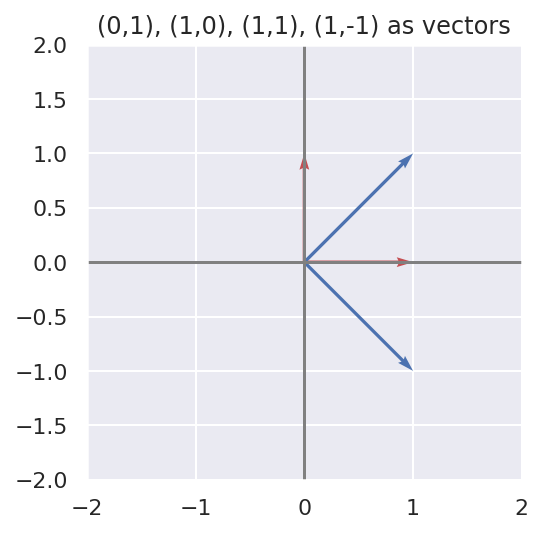

In [7]:
import matplotlib.pyplot as plt

plt.figure()
ax = plt.gca()
ax.axhline(y=0, color='0.5')
ax.axvline(x=0, color='0.5')
plt.quiver([0, 0], [0, 0], [0, 1], [1, 0], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver([0, 0], [0, 0], [1, 1], [1, -1], angles='xy', scale_units='xy', scale=1, color='b')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('(0,1), (1,0), (1,1), (1,-1) as vectors')
ax.set_aspect('equal')

plt.show();

$$\begin{pmatrix}1\\0\end{pmatrix}\cdot\begin{pmatrix}0\\1\end{pmatrix} = 0\qquad
\begin{pmatrix}1\\1\end{pmatrix}\cdot\begin{pmatrix}1\\-1\end{pmatrix} = 0$$

This turns out to hold true in general.  If two vectors are orthogonal, their dot product is zero.  This is actually how orthogonality is _defined_ in more complicated spaces - two vectors are orthogonal if and only if their dot product is zero.  This is so important we'll write it again

$$\vec{a} \cdot \vec{b} = 0 \qquad \iff \qquad \vec{a}\; \mathrm{and}\; \vec{b}\ 
\mathrm{are\ orthogonal}$$

We actually go one step further, and use this to define the angle between two vectors

$$\vec{a} \cdot \vec{b} = \lVert \vec{a} \lVert\,\lVert \vec{b} \lVert\,\cos(\theta)$$

Why is orthogonality so important?  It's because orthogonal vectors carry independent information from each other, just like our $x$ and $y$ directions.  They are also extremely important in the geometric interpretation, as they define different directions in a space.

## Linear independence


This idea of independent information is more than just vectors being orthogonal.  We say a set of vectors is _linearly independent_ if we can't write any of them as a linear combination of the others.  Orthogonal vectors are automatically linearly independent, but others can be as well.  In general, we say vectors $\{ \vec{v}_0, \ldots, \vec{v}_i, \ldots, \vec{v}_n \}$ are linearly dependent if we can find a set of constants $c_i$, not at equal to 0, such that

$$\sum_i c_i \vec{v}_i = c_0 \vec{v}_0 + c_1 \vec{v}_1 + ... + c_n \vec{v}_n = 0$$

As example of dependent vectors is

$$\begin{pmatrix}1\\1\\1\end{pmatrix} \qquad \begin{pmatrix}1\\1\\-1\end{pmatrix}
\qquad \begin{pmatrix}1\\1\\0\end{pmatrix}$$

since we can sum the first two to produce twice the second, like so:

$$\begin{pmatrix}1\\1\\1\end{pmatrix} + \begin{pmatrix}1\\1\\-1\end{pmatrix} =
\begin{pmatrix}2\\2\\0\end{pmatrix}
= 2\begin{pmatrix}1\\1\\0\end{pmatrix}$$

However, this very similar set is independent.

$$\begin{pmatrix}1\\1\\1\end{pmatrix} \qquad \begin{pmatrix}1\\1\\-1\end{pmatrix}
\qquad \begin{pmatrix}1\\-1\\0\end{pmatrix}$$

In a system with $n$ linearly independent vectors, we can define exactly $n$ orthogonal directions.  This is the _dimension_ of the system (yes, that term is overloaded).  It's a measure of the information content.

### Exercise
1. Can you prove that the following set of vectors are *not* linearly independent?
$$\begin{pmatrix}0\\1\\4\end{pmatrix} \qquad \begin{pmatrix}1\\0\\1\end{pmatrix}
\qquad \begin{pmatrix}-3\\1\\1\end{pmatrix}$$

In practice, we don't try to determine linear independence via inspection. Instead, we calculate the **determinant** of a matrix formed by the vectors. We won't go into how to calculate the determinant by hand but we will discuss how to do so using a Python package.

## Linear Transformations

We're going to take a small detour for a moment, and talk about linear functions.  We talked about these a little at the beginning - in 1-D they're functions that look like

$$f(x) = a x$$

where $a$ is a constant.  But we can also define them in more dimensions: they'll just take a vector in and we'll get a vector out (they don't need to be the same length).  An example from 3-D to 2-D is

$$\vec{f}(\vec{x}) = \begin{pmatrix}a_x x + a_y y + a_z z\\b_x x + b_y y + b_z z\end{pmatrix}$$

where $a_i$ and $b_i$ are all constants.  But this should look awfully familiar - it's just

$$\begin{pmatrix}a_x&a_y&a_z\\b_x&b_y&b_z\end{pmatrix}\begin{pmatrix}x\\y\\z\end{pmatrix}$$

Any such linear function can be expressed as a matrix - this is, of course, by design, it's how we got them in the first place.  They have a special property, though, that we can take advantage of

$$\vec{f}(\alpha \vec{x} + \beta \vec{y}) = \alpha\,\vec{f}(\vec{x}) + 
\beta\,\vec{f}(\vec{y})$$

This property is so fundamental it actually defines what is a linear transformation in general.

### Exercise
1. A 90 degree rotation is a linear transformation; you can express the rotation using the following matrix
$$\mathbf{R} = \begin{pmatrix}0&-1\\1&0\end{pmatrix}.$$
Prove that this transformation is linear using the following two vectors:
$$
\vec{v}_1 = \begin{pmatrix}1\\0\end{pmatrix} \qquad 
\vec{v}_2 = \begin{pmatrix}2\\2\end{pmatrix}. \qquad
$$

## Eigenvectors and eigenvalues

Every square matrix (i.e. same number of rows as columns) turns out to have special vectors that it doesn't really change.  These are called "eigenvectors" (eigen is German for "own", they're also called "characteristic vectors"), and we define them simply as non-zero vectors where

$$\mathbf{M} \vec{v} = \lambda \vec{v}$$

where $\lambda$ is just a constant, called the _eigenvalue_ for that vector.  Note that multiple vectors can have the same eigenvalue, but if they do, so does any linear combination of them.  Note that these eigenvalues and eigenvectors can be complex numbers, even for a real-valued matrix.  Let's do an example, where we have worked out the eigenvectors beforehand.

$$\begin{pmatrix}1&-1\\1&1\end{pmatrix}\begin{pmatrix}1\\i\end{pmatrix} = 
\begin{pmatrix}1-i\\1+i\end{pmatrix} = (1-i)\begin{pmatrix}1\\i\end{pmatrix}\qquad
\begin{pmatrix}1&-1\\1&1\end{pmatrix}\begin{pmatrix}1\\-i\end{pmatrix} = 
\begin{pmatrix}1+i\\1-i\end{pmatrix} = (1+i)\begin{pmatrix}1\\-i\end{pmatrix}$$

Every matrix has (at most) as many of these vectors as it has dimensions, and knowing these vectors plus the $\lambda$ for each tells you everything you can know about the matrix.  This "eigensystem" can let you reconstruct the original matrix, but it offers more.  The eigenvectors form a linearly independent set of vectors.  Knowing the eigenvalues lets you calculate many matrix properties easily.  The eigenvectors let you rewrite the matrix in a much simpler form (if there are enough of them).  And these eigenvectors are "fixed points" of the corresponding linear transformation.

There is a general way to compute eigenvalues and eigenvectors, but it's relatively advanced.  For now, we can use a computer program if we need them, but their mere existence actually tells us a lot later on.

### Exercise
1. Determine the corresponding eigenvalue for the matrix $$\begin{pmatrix}2&3\\4&1\end{pmatrix}$$ for the eigenvector $$\begin{pmatrix}7\\7\end{pmatrix}.$$

## NumPy

Many programming languages have very efficient implementations of linear algebra.  Python is no exception.  There are several, but the one we'll use here (and the most common) is NumPy.  We'll introduce the NumPy version of everything we do as we go along, starting with defining a vector and a matrix.

We define a matrix by calling `np.array` on a list (for a vector) or a list-of-lists (for a matrix):

In [8]:
import numpy as np

m1 = np.array([[2, 3, 4], [7, -1, 9]])
print(m1)
print()
x = np.array([1, 2, 3])
print(x)

[[ 2  3  4]
 [ 7 -1  9]]

[1 2 3]


These objects are of type `ndarray` in NumPy, and each can also tell you its shape:

In [9]:
print(m1.shape)
print(x.shape)

(2, 3)
(3,)


Note something a little different about the vector here - it only has one dimension.  For vectors, NumPy doesn't make the distinction between a column and a row vector, because it doesn't (usually) need to, it knows what to do.  If we want to be explicit about what we mean, we can use `reshape` to force it to the right dimensions.

In [ ]:
x_row = x.reshape(1,-1)
print(x_row)
print(x_row.shape)
print()

x_col = x.reshape(-1,1)
print(x_col)
print(x_col.shape)

If we want to select a particular row, or column, or element of our matrix, we use a fairly natural index notation, with the added wrinkle that `:` says "take everything".  It's the same as Python's slicing notation, except we can do multiple indices at the same time.

In [ ]:
#Second row of m1
print(m1[1])
print()

#First column of m1
print(m1[:,0])
print()

#First two rows and two columns of m1
print(m1[0:2,0:2])
print()

#The 1,2 element
print(m1[1,2])

We'll explore more about slicing and indexing later.

### Exercise
1. Consider the various matrices and vectors we have seen previous. Pick one or two and create a NumPy array of the matrix or vector.
1. Reshape the NumPy array. Are there certain set of values that result in an error? Does it make sense that an error results?

## Operations with NumPy arrays

NumPy comes with many built-in mathematical functions that are useful to transform your data. You should use these provided function as they

1. do not require explicitly writing out a `for` loop, and
1. are _vectorized_, taking advantage of how the array is configured in memory for faster computation.

### Universal functions

There are times where we would like to apply an operation to each element of the array. For example, we may want to take the sine of all values, preserving the dimensions of the array. Such functions that operate element-by-element are termed _universal_ functions.

We'll explore some important universal functions that you should take note of, but you can explore the NumPy library yourself to see them all.

In [ ]:
np.sin(m1) # all trig functions available

In [ ]:
# square root
np.sqrt(m1)

In [10]:
# natural log
print(np.log(m1)) 

# base 10 log
print(np.log10(m1))

# base 2 log
print(np.log2(m1)) 

[[0.69314718 1.09861229 1.38629436]
 [1.94591015        nan 2.19722458]]
[[0.30103    0.47712125 0.60205999]
 [0.84509804        nan 0.95424251]]
[[1.         1.5849625  2.        ]
 [2.80735492        nan 3.169925  ]]


<ipython-input-10-5b131ab89ae5>:2: RuntimeWarning: invalid value encountered in log
  print(np.log(m1))
<ipython-input-10-5b131ab89ae5>:5: RuntimeWarning: invalid value encountered in log10
  print(np.log10(m1))
<ipython-input-10-5b131ab89ae5>:8: RuntimeWarning: invalid value encountered in log2
  print(np.log2(m1))


NumPy has overloaded operators such as `+`, `-`, and `**` to be performed element-wise.

In [11]:
np.random.seed(17)
array_1 = np.random.rand(10, 2)
array_2 = np.random.rand(10, 2)
array_3 = array_1 + array_2

print(array_3)
print()
print(array_3.shape)

[[0.59239072 1.09209566]
 [0.58756822 0.85660107]
 [1.20546985 0.80023744]
 [0.78842759 0.63084424]
 [0.75710011 0.65013096]
 [1.14445706 0.8914086 ]
 [1.43203322 0.95963028]
 [0.59619224 0.81137736]
 [1.22851375 0.71598552]
 [0.92852469 1.1709706 ]]

(10, 2)


An extensive list of NumPy universal functions can be found [here](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#math-operations).

### Exercise
1. Create two NumPy arrays and add them together. If you have time, see what happens when you try to add two incompatible arrays.

### Matrix multiplication

In NumPy, matrix multiplication is achieved with `matmul`, or equivalently the `@` operator. Note that the normal multiplication symbol `*` does something quite different, which we won't address here.

In [ ]:
m2 = np.array([[1, 5], [-2, 7], [9, 9]])

print(np.matmul(m1, m2))
print()
print(m2 @ m1)

### Exercise
1. Create two NumPy arrays and multiply them. If you have time, see what happens when you try to multiply two incompatible arrays.

### Transpose and determinant

In NumPy, we get the transpose with either `np.transpose` or `.T`, and the scalar product of two vectors by simply calling `dot`. Since vectors in NumPy aren't aware of whether they are row or column vectors, we don't need to bother with the transpose (also, it doesn't do anything on vectors).

In [ ]:
print(np.transpose(m1))
print()
print(m2.T)
print()
print(np.dot(x, x))

As discussed previously, determining linear independence is difficult to do via inspection. Even calculating the determinant becomes difficult as the dimensions of the matrix gets bigger. Luckily, we can use NumPy to calculate the determinant of a matrix.

In [ ]:
A = np.array([[0, 1, -3], [1, 0, 1], [4, 1, 1]])
print("Not linearly independent")
print(A)
print(np.linalg.det(A))
print()

B = np.array([[0, 1, 1], [1, 0, 1], [4, 1, 1]])
print("Linearly independent")
print(B)
print(np.linalg.det(B))

## Performance improvements

When used correctly, NumPy's performance will be significantly faster than ordinary Python code. It isn't that ordinary Python code is anything less than awesome; it is because NumPy adds certain constraints to the data structures that enable faster computations.

Let's construct a list of lists of numbers to represent a matrix.

In [ ]:
def make_matrix(n_rows, n_cols):
    return [list(range(n_cols*i, n_cols*(i + 1))) for i in range(n_rows)]

test_data = make_matrix(400, 10)
test_data

We can index into this nested data structure in the usual manner:

In [ ]:
test_data[3][2]

If we want to calculate the sum of all the numbers, we can do that with a list comprehension.

In [ ]:
%%timeit

sum([sum(r) for r in test_data])

Now let's put the same data into a NumPy array data structure. We can do that with as follows:

In [ ]:
test_np_array = np.array(test_data)

In [ ]:
%%timeit

test_np_array.sum()

Not only is it easier to calculate the sum, simply calling the `sum` method, but it is faster. Further, there are bigger performance improvements if we make the test data larger. But why is it faster?

The most important reason is that Python allows the lists to contain general (object) data types. NumPy limits us to one data type. The array we created is limited to integers. Further, by restricting each entry of the array to be the same data type, the array is stored in memory using a contiguous block of memory as it would be for arrays in the C programming language. Note that C-style arrays are good for more than just quickly performing operations through Python; they're also good for talking to existing C and Fortran code. This interoperability explains why NumPy matters to you even if you won't do any matrix computations by hand: many of the libraries that you _will_ want to use will use NumPy arrays under the hood.

![NumPy array vs. Python list](images/numpy_array_vs_python_list.png)

### Exercise
1. Increase the size of the test array we used to benchmark the performance. How does the performance gain of NumPy change as we increase the size of the array?

## Array indexing

As demonstrated above, we can index into a NumPy array using the square brackets [ ]. This is slightly different from regular Python indexing in that one pair of brackets can be used for indexing in multiple dimensions.

In [ ]:
# Indexing into Python list of lists
print(test_data[3][4])

# Indexing into NumPy array
print(test_np_array[3, 4])

We can inspect and modify the shape of a NumPy array. This will also alter the array's indexing.

In [ ]:
small_array = np.random.rand(12)

small_array.shape

In [ ]:
small_array

In [ ]:
small_array.shape = (4, 3)

small_array

We can access a subset of the array if we wish:

In [ ]:
smaller_array = small_array[1:, 2:]

smaller_array

The image below illustrates indexing a NumPy array.

![array indexing](images/array_indexing.png)

This can also be used in assignments.

In [ ]:
smaller_array[1:] = 42

smaller_array

We changed `smaller_array`. What about the data in `small_array`?

In [ ]:
small_array

The original array changed also! But why?

The smaller array shares the memory space with the original array. The memory overlaps. Changes to one will be reflected in the other. NumPy was designed to do this for performance reasons.

If that's not what you need, use the `copy` method.

In [ ]:
small_array_copy = small_array.copy()

In [ ]:
small_array[[0, -1], :]

### Exercise

1. Select row 1 of `small_array`.
1. Select only the last two rows of column 1 of `small_array`.
1. Select all values of row 0 and 3 of `smal_array`. Hint: you can use a list to specify want indices you want for a row or a column.

*Copyright &copy; 2019 [Pragmatic Institute](https://www.pragmaticmarketing.com/data-science). This content is licensed solely for personal use. Redistribution or publication of this material is strictly prohibited.*